In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("Tree Dataset.csv")
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,4
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,4
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,1
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,1
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,2
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,2
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,2
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,2


In [3]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [4]:
#unique classes
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [5]:
corr_data = data.corr().iloc[-1:, :]
corr_data = pd.DataFrame(corr_data.values.reshape((15,1)))
corr_data.rename(index = {0:'Elevation', 1: 'Aspect', 2:'Slope', 3:'Horizontal_Distance_To_Hydrology',
                          4:'Vertical_Distance_To_Hydrology', 5:'Horizontal_Distance_To_Roadways', 6:'Hillshade_9am', 
                          7:'Hillshade_Noon', 8:'Hillshade_3pm', 9:'Horizontal_Distance_To_Fire_Points', 
                          10:'Wilderness_Area1', 11:'Wilderness_Area2', 12:'Wilderness_Area3', 13:'Wilderness_Area4',
                          14:'Cover_Type'}, columns={0:'Cover_Type'}, inplace=True)

<AxesSubplot:>

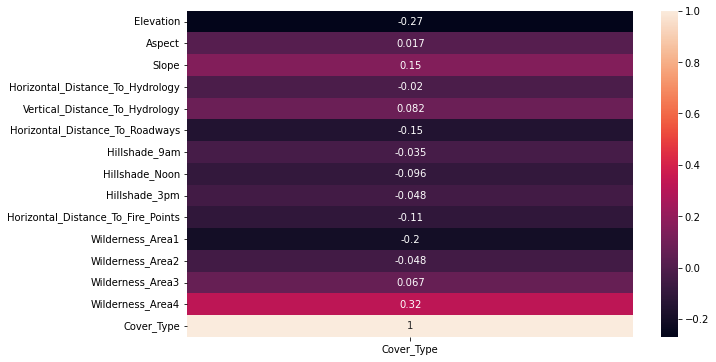

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_data, annot=True)

## Cover type mainly depends on Wilderness_Area4, Wilderness_Area1, Elevation as compared to other parameters...

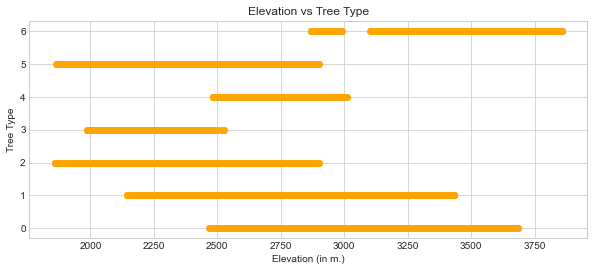

In [7]:
plt.figure(figsize=(10,4))
plt.style.use('seaborn-whitegrid')
plt.scatter(x.iloc[:,0], y.values, color='orange')
plt.xlabel("Elevation (in m.)")
plt.ylabel("Tree Type")
plt.title("Elevation vs Tree Type")
plt.show()

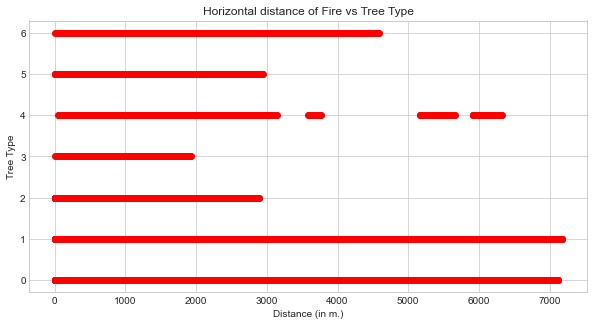

In [8]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-whitegrid')
plt.scatter(x.iloc[:, 9], y.values, color = 'red')
plt.xlabel("Distance (in m.)")
plt.ylabel("Tree Type")
plt.title('Horizontal distance of Fire vs Tree Type')
plt.show()

In [9]:
x1 = x.iloc[:10000,0]
x2 = x.iloc[:10000,2]
y_dash = y.iloc[:10000]
y1 = y_dash[y_dash==1]
y2 = y_dash[y_dash==2]
y3 = y_dash[y_dash==3]
y4 = y_dash[y_dash==4]
y5 = y_dash[y_dash==5]
y6 = y_dash[y_dash==6]
y7 = y_dash[y_dash==7]

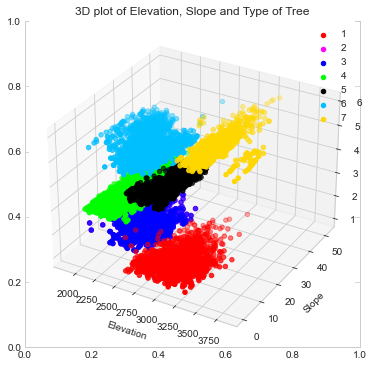

In [10]:
plt.figure(figsize=(6,6))
plt.title("3D plot of Elevation, Slope and Type of Tree")
plt_axes = plt.axes(projection='3d')
plt_axes.scatter3D(x1, x2, y1.values, c = 'red')
plt_axes.scatter3D(x1, x2, y2.values, c = 'magenta')
plt_axes.scatter3D(x1, x2, y2.values, c = 'blue')
plt_axes.scatter3D(x1, x2, y3.values, c = 'lime')
plt_axes.scatter3D(x1, x2, y4.values, c = 'black')
plt_axes.scatter3D(x1, x2, y5.values, c = 'deepskyblue')
plt_axes.scatter3D(x1, x2, y6.values, c = 'gold')
plt_axes.scatter3D(x1, x2, y7.values, c = 'tomato')
plt.legend(['1', '2', '3', '4', '5', '6', '7'])
plt.xlabel('Elevation')
plt.ylabel("Slope")
plt.show()

# Normalising the data

In [11]:
x_temp1 = x.iloc[:,:10]
x_temp2 = x.iloc[:,10:14]

In [12]:
normalisation_layer = tf.keras.layers.Normalization(axis = 1)
normalisation_layer.adapt(x_temp1)
normal_x = pd.DataFrame(normalisation_layer(x_temp1))
normal_x.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.297867,-0.935159,-1.482834,-0.053776,-0.796276,-1.180179,0.330705,0.439146,0.142939,3.246369
1,-1.319297,-0.890481,-1.616379,-0.270201,-0.899202,-1.257141,0.293349,0.590903,0.221321,3.205589
2,-0.554954,-0.148828,-0.681568,-0.006727,0.318751,0.532217,0.816330,0.742660,-0.196717,3.127049
3,-0.622816,-0.005859,0.520331,-0.129054,1.227927,0.474496,0.965753,0.742660,-0.536373,3.195016
4,-1.301438,-0.988772,-1.616379,-0.547790,-0.813431,-1.256500,0.293349,0.540317,0.195193,3.165564


In [13]:
x_normalised_total = pd.concat([normal_x, x_temp2], axis=1)
x_normalised_total.rename(columns={0:'Elevation', 1:'Aspect', 2:'Slope', 3:'Horizontal_Distance_To_Hydrology',
                                   4:'Vertical_Distance_To_Hydrology', 5:'Horizontal_Distance_To_Roadways',6:'Hillshade_9am', 
                                   7:'Hillshade_Noon', 8:'Hillshade_3pm',9:'Horizontal_Distance_To_Fire_Points',
                                   10:'Wilderness_Area1',11:'Wilderness_Area2', 12:'Wilderness_Area3', 13:'Wilderness_Area4'}, 
                          inplace=True)
x_normalised_total.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,-1.297867,-0.935159,-1.482834,-0.053776,-0.796276,-1.180179,0.330705,0.439146,0.142939,3.246369,1,0,0,0
1,-1.319297,-0.890481,-1.616379,-0.270201,-0.899202,-1.257141,0.293349,0.590903,0.221321,3.205589,1,0,0,0
2,-0.554954,-0.148828,-0.681568,-0.006727,0.318751,0.532217,0.816330,0.742660,-0.196717,3.127049,1,0,0,0
3,-0.622816,-0.005859,0.520331,-0.129054,1.227927,0.474496,0.965753,0.742660,-0.536373,3.195016,1,0,0,0
4,-1.301438,-0.988772,-1.616379,-0.547790,-0.813431,-1.256500,0.293349,0.540317,0.195193,3.165564,1,0,0,0


# ReLU Activation Function:-
The ReLU equation is: ReLU is the most often used activation function in neural networks.

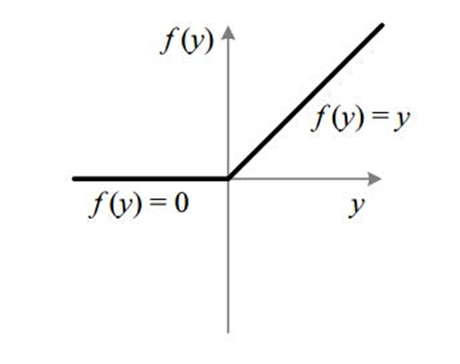

ReLU's output is 0 for negative input and x for positive input, respectively.
Despite appearances, it is not a linear function. ReLU has a backpropagation feature and a derivative function.

ReLU has a drawback, though. The neural network cannot execute backpropagation if most of the input values are negative or 
0, as the ReLU returns an output of 0. The Dying ReLU issue is what is meant by this. ReLU is an unbounded function, 
so ReLU is an unbounded function; there is no maximum value.

### Pros:
less complexity in space and time.<br>
prevents the gradient's disappearing issue.<br>


### Cons:
Introduces the issue with dead relu.<br>
Does not avoid the exploding gradient problem.

# Softmax Activation Function for Output Layer:
The softmax function is a function that turns a vector of K real values into a vector of K real values that sum to 1. The input values can be positive, negative, zero, or greater than one, but the softmax transforms them into values between 0 and 1, so that they can be interpreted as probabilities. If one of the inputs is small or negative, the softmax turns it into a small probability, and if an input is large, then it turns it into a large probability, but it will always remain between 0 and 1.<br>

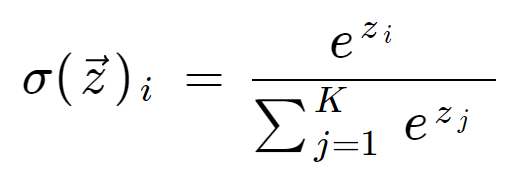

The softmax function is sometimes called the softargmax function, or multi-class logistic regression. This is because the softmax is a generalization of logistic regression that can be used for multi-class classification, and its formula is very similar to the sigmoid function which is used for logistic regression. The softmax function can be used in a classifier only when the classes are mutually exclusive.<br>

Many multi-layer neural networks end in a penultimate layer which outputs real-valued scores that are not conveniently scaled and which may be difficult to work with. Here the softmax is very useful because it converts the scores to a normalized probability distribution, which can be displayed to a user or used as input to other systems. For this reason it is usual to append a softmax function as the final layer of the neural network.

In [14]:
model1 = Sequential([tf.keras.Input(shape=x_normalised_total.shape[1]),
                    Dense(units=5, activation='relu', name = 'layer1'),
                    Dense(units=5, activation='relu', name = 'layer2'),
                    Dense(units=7, activation='relu', name = 'layer3'),
                    Dense(units=7, activation='softmax', name = 'output_layer')])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 5)                 75        
                                                                 
 layer2 (Dense)              (None, 5)                 30        
                                                                 
 layer3 (Dense)              (None, 7)                 42        
                                                                 
 output_layer (Dense)        (None, 7)                 56        
                                                                 
Total params: 203
Trainable params: 203
Non-trainable params: 0
_________________________________________________________________


## Train Test Split of the Data

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_normalised_total, y, test_size=0.35)

In [16]:
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(0.001))

history1 = model1.fit(x_train, y_train, epochs = 30)

Epoch 1/30


C:\Users\Mayur\anaconda3\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


11802/11802 [==============================] - 20s 2ms/step - loss: 0.7425
Epoch 2/30
11802/11802 [==============================] - 19s 2ms/step - loss: 0.6677
Epoch 3/30
11802/11802 [==============================] - 19s 2ms/step - loss: 0.6532
Epoch 4/30
11802/11802 [==============================] - 19s 2ms/step - loss: 0.6476
Epoch 5/30
11802/11802 [==============================] - 20s 2ms/step - loss: 0.6450
Epoch 6/30
11802/11802 [==============================] - 19s 2ms/step - loss: 0.6431
Epoch 7/30
11802/11802 [==============================] - 19s 2ms/step - loss: 0.6416
Epoch 8/30
11802/11802 [==============================] - 18s 2ms/step - loss: 0.6410
Epoch 9/30
11802/11802 [==============================] - 21s 2ms/step - loss: 0.6406
Epoch 10/30
11802/11802 [==============================] - 18s 2ms/step - loss: 0.6400
Epoch 11/30
11802/11802 [==============================] - 20s 2ms/step - loss: 0.6394
Epoch 12/30
11802/11802 [==============================] - 18s 

In [17]:
y_pred1 = np.argmax(model1.predict(x_test), axis = 1)
y_pred1

6355/6355 [==============================] - 7s 1ms/step


array([6, 1, 0, ..., 1, 0, 1], dtype=int64)

In [18]:
score1 = accuracy_score(y_test, y_pred1)

0.7201839148287478

In [19]:
from pprint import pprint
pprint(model1.get_config())

{'layers': [{'class_name': 'InputLayer',
             'config': {'batch_input_shape': (None, 14),
                        'dtype': 'float32',
                        'name': 'input_1',
                        'ragged': False,
                        'sparse': False}},
            {'class_name': 'Dense',
             'config': {'activation': 'relu',
                        'activity_regularizer': None,
                        'bias_constraint': None,
                        'bias_initializer': {'class_name': 'Zeros',
                                             'config': {}},
                        'bias_regularizer': None,
                        'dtype': 'float32',
                        'kernel_constraint': None,
                        'kernel_initializer': {'class_name': 'GlorotUniform',
                                               'config': {'seed': None}},
                        'kernel_regularizer': None,
                        'name': 'layer1',
                        'tr

In [38]:
loss1 = np.array(history1.history.get('loss'))
loss1

array([0.74248898, 0.66773736, 0.65320462, 0.64763403, 0.64496922,
       0.64309084, 0.64157087, 0.64103687, 0.64060003, 0.63999522,
       0.63936734, 0.6391784 , 0.63868064, 0.63841748, 0.63817716,
       0.63782442, 0.63774693, 0.63745403, 0.63730603, 0.6368652 ,
       0.63683128, 0.63653719, 0.63642085, 0.63622826, 0.63587689,
       0.63569027, 0.6358242 , 0.63523066, 0.63536316, 0.63529545])

# Linear Activation Function for Output Layer:-
The activation function is a straightforward straight line, and it is directly proportional to the input's weighted sum of neurons. A line with a positive slope may cause the firing rate to rise as the input rate increases. Linear activation functions are superior at providing a wide range of activations.

In binary, a neuron is either firing or not firing. If you are familiar with gradient descent in deep learning, you will observe that the derivative in this function is constant.

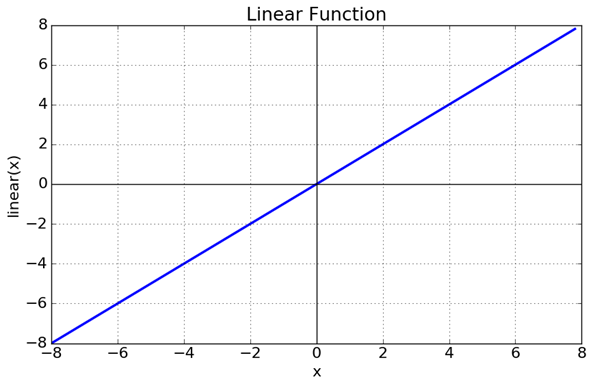

Where m is a constant and the derivative with respect to Z. Additionally constant and unrelated to Z is the meaning gradient. This won't be the case if the modifications performed in the backpropagation are constant and independent of Z.

In [21]:
model2 = Sequential([tf.keras.Input(shape=x_normalised_total.shape[1]),
                    Dense(units=4, activation='relu', name = 'layer1'),
                    Dense(units=5, activation='relu', name = 'layer2'),
                    Dense(units=4, activation='relu', name = 'layer3'),
                    Dense(units=7, activation='linear', name = 'output_layer')])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 4)                 60        
                                                                 
 layer2 (Dense)              (None, 5)                 25        
                                                                 
 layer3 (Dense)              (None, 4)                 24        
                                                                 
 output_layer (Dense)        (None, 7)                 35        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


In [22]:
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(0.001))

history2 = model2.fit(x_train, y_train, epochs = 30)

Epoch 1/30
11802/11802 [==============================] - 20s 2ms/step - loss: 0.7825
Epoch 2/30
11802/11802 [==============================] - 19s 2ms/step - loss: 0.6966
Epoch 3/30
11802/11802 [==============================] - 20s 2ms/step - loss: 0.6910
Epoch 4/30
11802/11802 [==============================] - 19s 2ms/step - loss: 0.6890
Epoch 5/30
11802/11802 [==============================] - 19s 2ms/step - loss: 0.6874
Epoch 6/30
11802/11802 [==============================] - 19s 2ms/step - loss: 0.6866
Epoch 7/30
11802/11802 [==============================] - 19s 2ms/step - loss: 0.6861
Epoch 8/30
11802/11802 [==============================] - 19s 2ms/step - loss: 0.6858
Epoch 9/30
11802/11802 [==============================] - 19s 2ms/step - loss: 0.6855
Epoch 10/30
11802/11802 [==============================] - 18s 2ms/step - loss: 0.6849
Epoch 11/30
11802/11802 [==============================] - 18s 2ms/step - loss: 0.6849
Epoch 12/30
11802/11802 [===========================

In [23]:
y_pred2 = np.argmax(model2.predict(x_test), axis = 1)
y_pred2

6355/6355 [==============================] - 7s 1ms/step


array([6, 1, 0, ..., 1, 1, 1], dtype=int64)

In [24]:
score2 = accuracy_score(y_test, y_pred2)

0.7045855769467188

In [25]:
from pprint import pprint
pprint(model2.get_config())

{'layers': [{'class_name': 'InputLayer',
             'config': {'batch_input_shape': (None, 14),
                        'dtype': 'float32',
                        'name': 'input_2',
                        'ragged': False,
                        'sparse': False}},
            {'class_name': 'Dense',
             'config': {'activation': 'relu',
                        'activity_regularizer': None,
                        'bias_constraint': None,
                        'bias_initializer': {'class_name': 'Zeros',
                                             'config': {}},
                        'bias_regularizer': None,
                        'dtype': 'float32',
                        'kernel_constraint': None,
                        'kernel_initializer': {'class_name': 'GlorotUniform',
                                               'config': {'seed': None}},
                        'kernel_regularizer': None,
                        'name': 'layer1',
                        'tr

In [37]:
loss2 = (np.array(history2.history.get('loss')))
loss2

array([0.7824595 , 0.69661862, 0.69104338, 0.68903494, 0.68742478,
       0.68664795, 0.68608046, 0.68576908, 0.6854884 , 0.6849488 ,
       0.68487424, 0.68477887, 0.68453097, 0.68443394, 0.68438923,
       0.68422467, 0.68417895, 0.68402481, 0.68384087, 0.68349463,
       0.68366128, 0.68343025, 0.68332022, 0.68322134, 0.68303812,
       0.68277621, 0.68271369, 0.68263572, 0.68243408, 0.68212253])

Text(0.5, 1.0, 'Loss vs. Iterations')

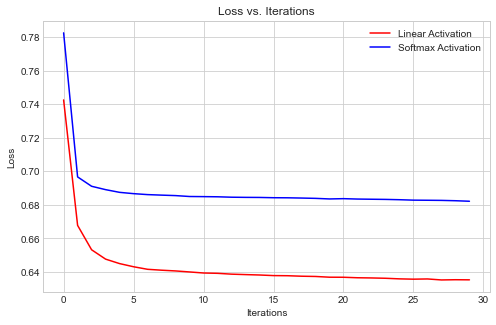

In [40]:
plt.figure(figsize=(8, 5))
plt.plot(loss1, color = 'red')
plt.plot(loss2, color = 'blue')
plt.xlabel('Iterations')
plt.ylabel("Loss")
plt.legend(['Linear Activation', 'Softmax Activation'])
plt.title('Loss vs. Iterations')

# Conclusion: Linear Activation Function converges better than Softmax Activation Function